In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [3]:
df=pd.read_csv("gold_price_data.csv")
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.drop("Date",axis=1,inplace=True)

In [6]:
df.corr()["GLD"]

,GLD
SPX,0.049345
GLD,1.000000
USO,-0.186360
SLV,0.866632
EUR/USD,-0.024375


<Axes: >

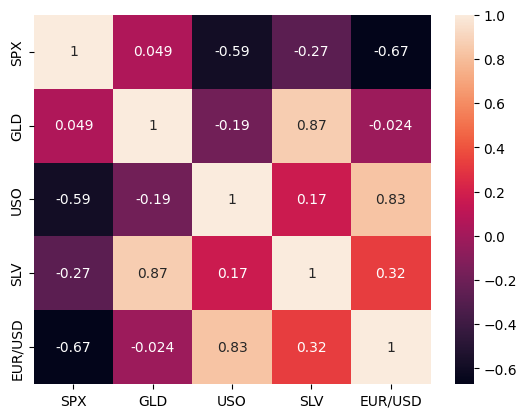

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df.isnull().sum()

,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


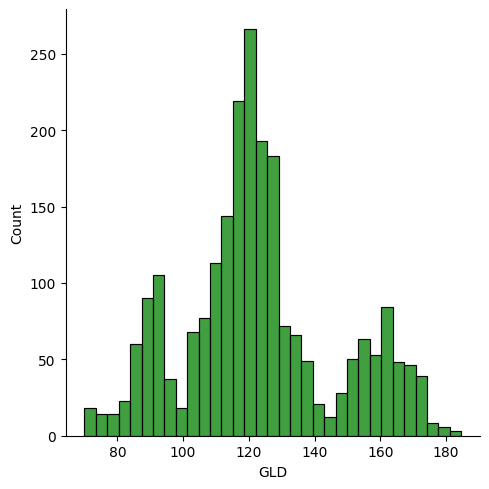

In [9]:
sns.displot(df['GLD'],color='green')

In [10]:
X=df.drop(['GLD'],axis=1)
y=df['GLD']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [12]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [13]:
y

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
...,...
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998


In [14]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [15]:
X_train

array([[ 1.89799481, -0.9162265 , -0.65044128, -0.56820195],
       [ 0.74485541, -0.93898837, -0.89559865, -1.56823867],
       [-1.06242144,  0.19303503, -0.40951076,  1.44080797],
       ...,
       [-0.37279394,  0.09642356,  1.39817262,  0.27887521],
       [-1.58948161, -0.25309752, -0.98858938,  0.06359543],
       [-0.53541866, -0.03104293,  1.60387923, -0.05329198]])

In [16]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.9870872159948855

In [19]:
pickle.dump(model, open("model.pkl", "wb"))